In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Data Set/01-Petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


C:\Users\Hrushi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_Consumption', ylabel='Density'>

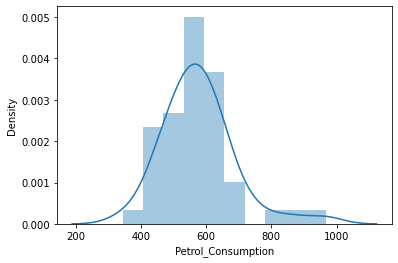

In [6]:
sns.distplot(df['Petrol_Consumption'])

In [7]:

df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [9]:
corr = df.corr()
corr.sort_values(['Petrol_Consumption'], ascending = False, inplace = True)
df2= pd.DataFrame(corr.Petrol_Consumption)
df2

,Petrol_Consumption
Petrol_Consumption,1.000000
Population_Driver_licence(%),0.698965
Paved_Highways,0.019042
Average_income,-0.244862
Petrol_tax,-0.451280


In [10]:
X= df.drop('Petrol_Consumption',axis=1)
Y = df.loc[:,['Petrol_Consumption']].values
Y.shape

(48, 1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(48, 4)

In [56]:
Y = Y.reshape(-1)
Y.shape

(48,)

In [40]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.40,random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #training the model
reg = lr.fit(X_train, y_train)

In [44]:
y_pred = reg.predict(X_test)


In [45]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
R2= r2_score(y_test, y_pred)

Mean squared error: 4024.20
Coefficient of determination: 0.54


In [46]:
prediction_output = pd.DataFrame(data = [y_test,y_pred],index = ['y_test','y_predict'])
prediction_output.transpose()

,y_test,y_predict
0,534.0,479.529225
1,410.0,561.289843
2,577.0,597.110288
3,571.0,581.837731
4,577.0,652.458049
5,704.0,648.345199
6,487.0,533.148451
7,587.0,669.287544
8,467.0,505.397903
9,580.0,502.185356


In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)

ridge=Ridge()
#parameters={'alpha':[1.0]}
ridge_regressor=GridSearchCV(ridge,grid,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
ridge_regressor.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
lasso=Lasso()
#parameters={'alpha':[1.0]}
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)
lasso_regressor=GridSearchCV(lasso,grid,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

lasso_regressor.fit(X, Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [49]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,prediction_ridge))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction_ridge))
R2= r2_score(y_test, prediction_ridge)

Mean squared error: 2956.88
Coefficient of determination: 0.66


In [51]:
prediction_output = pd.DataFrame(data = [y_test, prediction_ridge],index = ['y_test','y_predict'])
prediction_output.transpose()

,y_test,y_predict
0,534.0,473.291490
1,410.0,532.801951
2,577.0,588.050718
3,571.0,567.151966
4,577.0,649.730764
5,704.0,640.827836
6,487.0,507.409440
7,587.0,661.536082
8,467.0,493.283782
9,580.0,501.870879


<AxesSubplot:>

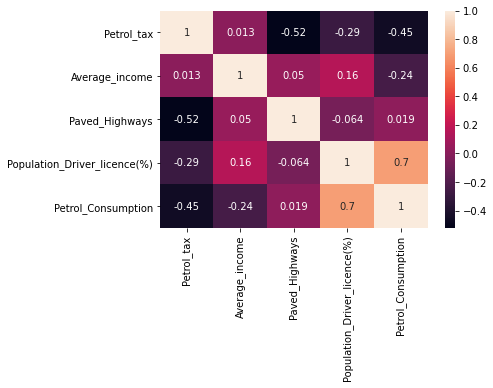

In [52]:
sns.heatmap(df.corr(), annot=True)

ValueError: x and y must be the same size

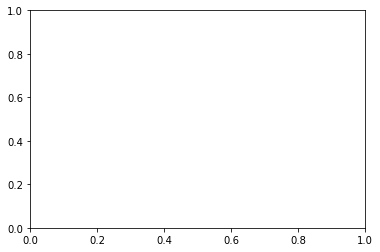

In [53]:
#visualising the training set
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Average_Income vs Petrol_Consumption')
plt.Xlabel('Petrol_Consumption')
plt.Ylabel('Average_Income')
plt.show()